#**Twitter Stock Market Analysis**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("/content/TWTR.xlsx")

# **Task 1: Data Analysis**

### Read the data and display the first 100 rows from the data:

In [3]:
data.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2018-01-02,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2018-01-03,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2018-01-04,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2018-01-05,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
95,2018-04-06,45.090000,46.400002,43.310001,46.320000,46.320000,15507597.0
96,2018-04-07,46.650002,47.340000,45.700001,47.299999,47.299999,9610491.0
97,2018-04-08,47.549999,47.750000,46.430000,46.669998,46.669998,5794497.0
98,2018-04-09,46.709999,47.590000,46.180000,46.980000,46.980000,6916147.0


### Give the column insights:

In [4]:

print(data.info())

print(data.describe())

print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB
None
                      Date         Open         High          Low  \
count                 2264  2259.000000  2259.000000  2259.000000   
mean   2021-02-05 12:00:00    36.020286    36.699881    35.339465   
min    2018-01-01 00:00:00    13.950000    14.220000    13.725000   
25%    2019-07-20 18:00:00    25.550000    26.215001    24.912501   
50%    2021-02-05 12:00:00    35.419998    36.099998    34.8


Column: Open
  Data Type: float64
  Range: [13.95, 78.360001]
  Unique Values: 1722

Column: High
  Data Type: float64
  Range: [14.22, 80.75]
  Unique Values: 1843

Column: Low
  Data Type: float64
  Range: [13.725, 76.050003]
  Unique Values: 1793

Column: Close
  Data Type: float64
  Range: [14.01, 77.629997]
  Unique Values: 1741


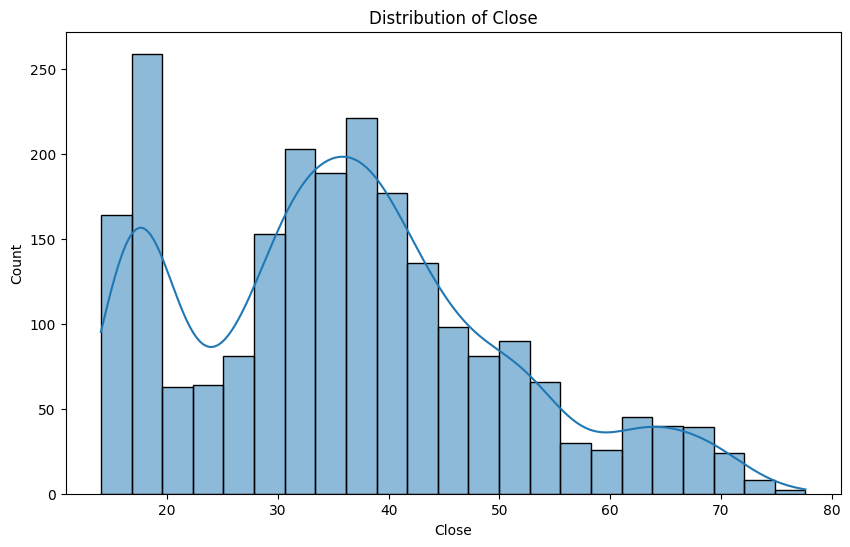


Column: Adj Close
  Data Type: float64
  Range: [14.01, 77.629997]
  Unique Values: 1741

Column: Volume
  Data Type: float64
  Range: [0.0, 269213085.0]
  Unique Values: 2258
Volume
0.0            2
117701670.0    1
22740598.0     1
36865133.0     1
22716679.0     1
20340173.0     1
16645852.0     1
15313793.0     1
10624448.0     1
20674782.0     1
Name: count, dtype: int64


In [5]:
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    print(f"\nColumn: {col}")
    print(f"  Data Type: {data[col].dtype}")
    print(f"  Range: [{data[col].min()}, {data[col].max()}]")
    print(f"  Unique Values: {data[col].nunique()}")

    if col == 'Close':
      plt.figure(figsize=(10, 6))
      sns.histplot(data[col], kde=True)
      plt.title(f'Distribution of {col}')
      plt.show()

    if col == 'Volume':
      print(data['Volume'].value_counts().head(10))

### Check whether this dataset contains any null values or not, if there are any, then remove the null values:

In [6]:
data.dropna(inplace=True)

print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Find the statistical description of the data:

In [7]:
print(data.describe())

                      Date         Open         High          Low  \
count                 2259  2259.000000  2259.000000  2259.000000   
mean   2021-02-03 00:00:00    36.020286    36.699881    35.339465   
min    2018-01-01 00:00:00    13.950000    14.220000    13.725000   
25%    2019-07-19 12:00:00    25.550000    26.215001    24.912501   
50%    2021-02-03 00:00:00    35.419998    36.099998    34.820000   
75%    2022-08-21 12:00:00    44.205000    45.015000    43.327501   
max    2024-03-08 00:00:00    78.360001    80.750000    76.050003   
std                    NaN    14.118463    14.372057    13.828724   

             Close    Adj Close        Volume  
count  2259.000000  2259.000000  2.259000e+03  
mean     36.003625    36.003625  2.175186e+07  
min      14.010000    14.010000  0.000000e+00  
25%      25.410000    25.410000  1.233530e+07  
50%      35.490002    35.490002  1.691305e+07  
75%      44.135000    44.135000  2.428082e+07  
max      77.629997    77.629997  2.692131e

### Find the missing values in the data:

In [8]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# **Task 2: Statistical Tests and Analysis (Optional)**

# **Task 3: Visualization and Analysis**

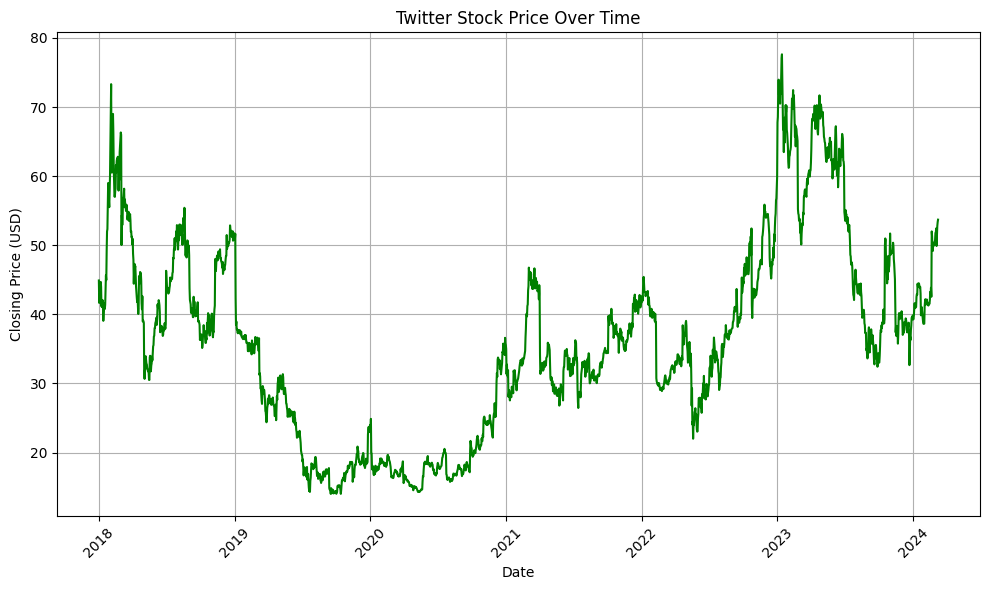

"Conclusion:\n      The plot shows the fluctuation of Twitter's stock price over time.\nInitial observations might include periods of growth and decline, potential correlation with market trends, or significant events impacting the stock price.\nA more in-depth analysis could involve calculating moving averages, identifying support and resistance levels, and considering external factors."

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Twitter Stock Price Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""Conclusion:
      The plot shows the fluctuation of Twitter's stock price over time.
Initial observations might include periods of growth and decline, potential correlation with market trends, or significant events impacting the stock price.
A more in-depth analysis could involve calculating moving averages, identifying support and resistance levels, and considering external factors."""

### Compare the Close vs Date column for Twitter prices over the years:


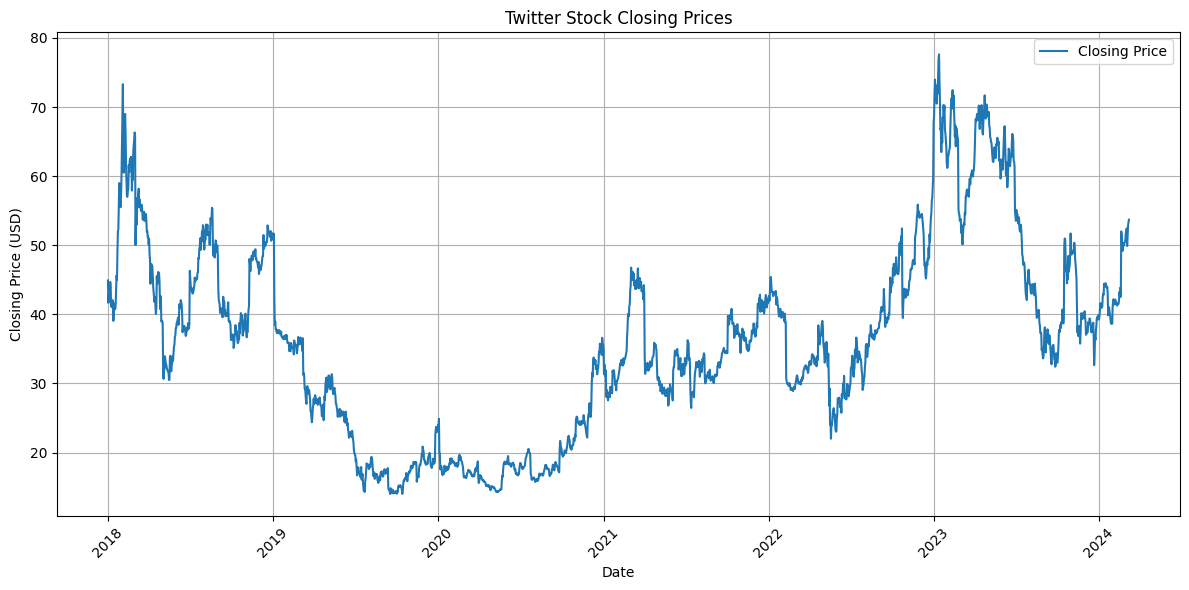

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price')

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Twitter Stock Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Assign buttons to control time periods. Add the buttons to analyze the stock prices of Twitter in different time periods:

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2018-01-02,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2018-01-03,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2018-01-04,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2018-01-05,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [12]:
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])
data.dropna(inplace=True)
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

def plot_stock_prices(start_date, end_date):
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

    if filtered_data.empty:
      print("No data available for the selected time period.")
      return

    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Close'], label='Closing Price')
    plt.plot(filtered_data['Date'], filtered_data['MA50'], label='50-Day MA')
    plt.plot(filtered_data['Date'], filtered_data['MA200'], label='200-Day MA')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(f'Twitter Stock Closing Prices from {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

time_periods = {
    'Last 3 Months': (data['Date'].max() - pd.DateOffset(months=3), data['Date'].max()),
    'Last 6 Months': (data['Date'].max() - pd.DateOffset(months=6), data['Date'].max()),
    'Last 1 Year': (data['Date'].max() - pd.DateOffset(years=1), data['Date'].max()),
    'Last 3 Years': (data['Date'].max() - pd.DateOffset(years=3), data['Date'].max()),
    'All Time': (data['Date'].min(), data['Date'].max()),
}

buttons = []
for period_name, (start_date, end_date) in time_periods.items():
    button = widgets.Button(description=period_name)
    def on_button_clicked(b, start_date=start_date, end_date=end_date):
        plot_stock_prices(start_date, end_date)
    button.on_click(on_button_clicked)
    buttons.append(button)

display(*buttons)

Button(description='Last 3 Months', style=ButtonStyle())

Button(description='Last 6 Months', style=ButtonStyle())

Button(description='Last 1 Year', style=ButtonStyle())

Button(description='Last 3 Years', style=ButtonStyle())

Button(description='All Time', style=ButtonStyle())

### Give the complete timeline of Twitter in the stock market (Line Graph):

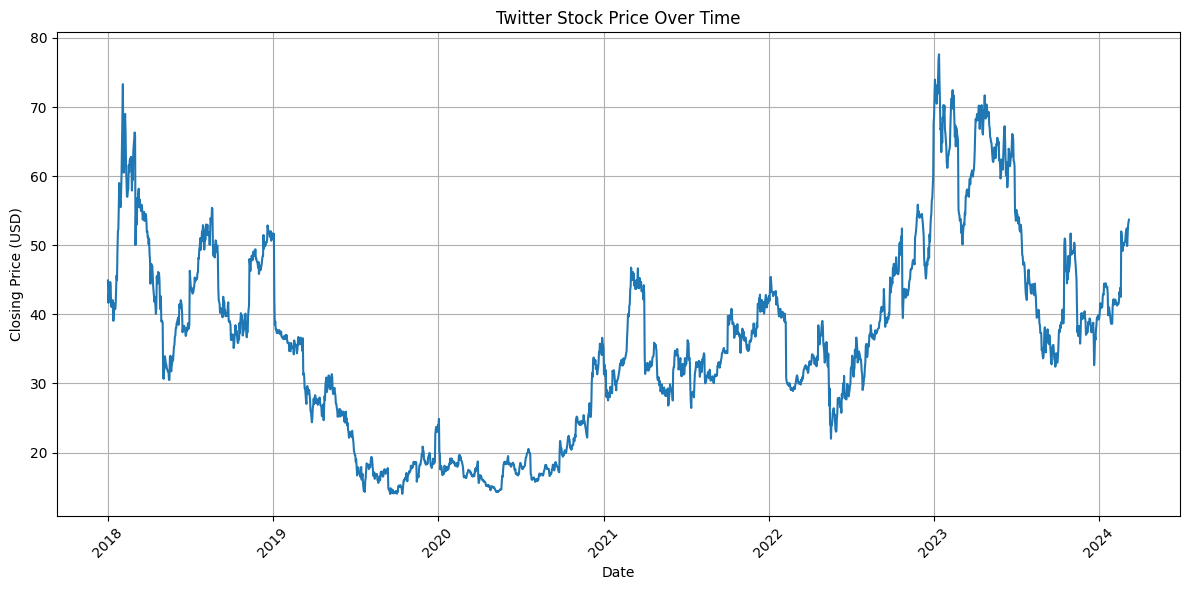

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Twitter Stock Price Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Give the insights for the above analysis and make a word cloud for that analysis:

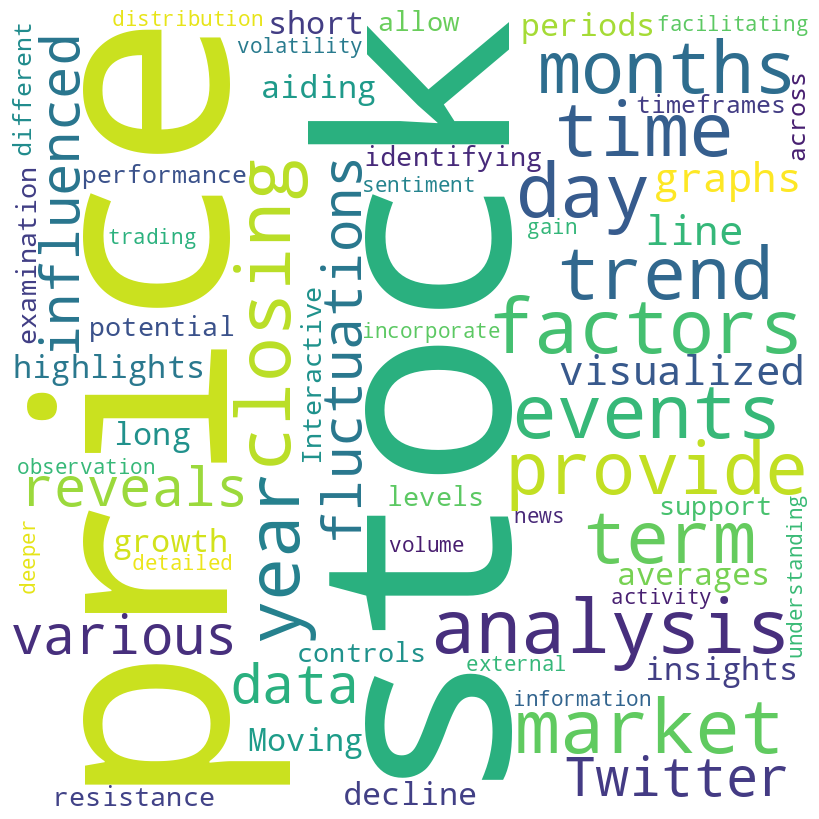

In [14]:
insights = """
The analysis of Twitter's stock price reveals fluctuations over time, influenced by various market factors and events.
The closing price data, visualized through line graphs, highlights periods of growth and decline.  Moving averages (50-day and 200-day) provide insights into short-term and long-term trends, aiding in identifying potential support and resistance levels.
Interactive controls allow examination of stock performance across different timeframes (3 months, 6 months, 1 year, 3 years, and all time), facilitating detailed trend observation.
The distribution of closing prices and volume provide further information about the stock's volatility and trading activity.
Further analysis could incorporate external factors (news events, market sentiment) to gain deeper understanding.
"""

# Word Cloud Generation

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(insights)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Create a Summary Conclusion for the Entire Analysis and show the insights to the client:

In [19]:
insights_for_client = """
Summary of Twitter Stock Analysis

This analysis examined Twitter's stock performance over time, utilizing historical stock price data.  Key findings include:

Price Fluctuations: Twitter's stock price has shown significant volatility, with periods of growth and decline.  Visualizations illustrate these price movements clearly, allowing for identification of trends.
Moving Averages:  The use of 50-day and 200-day moving averages helped to identify short-term and long-term trends within the stock's performance. These averages can be valuable indicators for potential investment decisions.
Time-Series Analysis: Interactive tools enabled the exploration of Twitter's stock behavior across various timeframes. This interactive exploration allows for detailed observation of trends over specific periods.
Volume and Distribution: Analysis of trading volume and the distribution of closing prices provided further context regarding the stock's volatility and trading activity.
Further Exploration: While this analysis provides a comprehensive overview, incorporating external factors such as news events and overall market sentiment could enhance the predictive capabilities and provide even deeper insights into the drivers of Twitter's stock performance.  Additional analysis may involve more sophisticated statistical modeling and consideration of broader market conditions.

Recommendations:

Continued Monitoring:  Regularly monitoring the stock's performance in relation to market trends and news is crucial for making informed decisions.
External Factors:  Consider incorporating external data sources (news sentiment, economic indicators) into future analyses for more nuanced insights.
Advanced Modeling: For more sophisticated prediction, explore statistical models like ARIMA or more advanced machine learning techniques.

We believe this analysis provides a robust foundation for understanding Twitter's stock history. However, it is essential to remember that stock market predictions are not guaranteed, and past performance does not predict future results. Consult with a financial advisor before making investment decisions.
"""

print(insights_for_client)


Summary of Twitter Stock Analysis

This analysis examined Twitter's stock performance over time, utilizing historical stock price data.  Key findings include:

Price Fluctuations: Twitter's stock price has shown significant volatility, with periods of growth and decline.  Visualizations illustrate these price movements clearly, allowing for identification of trends.
Moving Averages:  The use of 50-day and 200-day moving averages helped to identify short-term and long-term trends within the stock's performance. These averages can be valuable indicators for potential investment decisions.
Time-Series Analysis: Interactive tools enabled the exploration of Twitter's stock behavior across various timeframes. This interactive exploration allows for detailed observation of trends over specific periods.
Volume and Distribution: Analysis of trading volume and the distribution of closing prices provided further context regarding the stock's volatility and trading activity.
Further Exploration: 